# 1. **AND / OR 연산을 수행하는 퍼셉트론**



In [1]:
import numpy as np
W, b = np.array([0.5, 0.5]), -0.7

numpy를 import합니다.
W,b는 각각 **가중치(Weight)와 편향(Bias)**을 의미합니다.

가중치는 각각의 입력값(x)에 존재하는데, 가중치의 값이 크면 클수록 해당 입력 값이 중요하다는 것을 의미한다.

여기서 가중치와 입력값의 곱의 전체 합이 임계치(Threshold)를 넘으면 출력 신호로 1을 출력하고, 그렇지 않을 경우에는 0(-1)을 출력합니다.

대표적인 AND 게이트 예시로 쓰이는 [0.5, 0.5, -0.7], [0.5, 0.5, -0.8] 또는 [1.0, 1.0, -1.0] 등 다양한 조합이 있습니다.

In [2]:
def perceptron(x1, x2):
    x = np.array([x1, x2])
    tmp = np.sum( W * x ) + b
    if tmp <= 0: return -1
    else: return 1

Perceptron 식으로 입력값 (x1, x2)를 받습니다.

이때의 각 입력값은 np.array로 받습니다.

tmp = np.sum(W*x)+b는 y = W(x1+x2)+b로
입력값(x)과 가중치(Weight)를 곱한 값에 편향(Bias)을 더합니다.
여기서 입력값 (x)는 (x1, x2)가 각각 들어가 가중치와 더합니다.

이 때, 위 식을 모두 수행해서 나온 전체 값(y=tmp)가 0보다 작거나 같으면 -1을, 0보다 크면 1을 return(출력)합니다.

In [3]:
print('--- 퍼셉트론으로 구현한 AND 게이트 ---')
for xs in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
    y = perceptron(xs[0], xs[1])
    print(xs, ': ', y)

--- 퍼셉트론으로 구현한 AND 게이트 ---
(-1, -1) :  -1
(-1, 1) :  -1
(1, -1) :  -1
(1, 1) :  1


위의 식을 수행한 결과,
[(-1, -1), (-1, 1), (1, -1), (1, 1)]은 각각의 x1, x2 인자로 입력되어 출력된 결과 [-1.7,-0.7,-0.7,0,3]으로 (1,1)만 빼고 모두 0보다 낮아 -1을 return 합니다.

AND 논리곱의 경우에는 두 개의 입력값이 모두 1인 경우에만 출력값이 1이 나오는 구조를 가지고 있습니다.

-1로 나온 값을 0이라고 가정할 때,다음과 같은 그래프가 그려집니다.
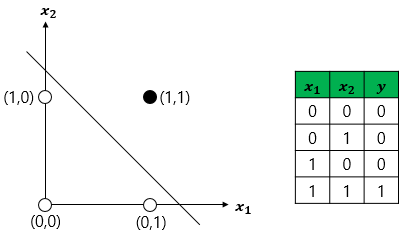


In [4]:
W, b = np.array([0.7, 0.7]), .5

이번 경우에는 OR 게이트입니다.
OR 게이트를 충족하는 가중치와 편향값 중 하나인
[0.7,0.7,0.5]를 사용합니다.

In [5]:
print('--- 퍼셉트론으로 구현한 OR 게이트 ---')
for xs in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
    y = perceptron(xs[0], xs[1])
    print(xs, ': ', y)

--- 퍼셉트론으로 구현한 OR 게이트 ---
(-1, -1) :  -1
(-1, 1) :  1
(1, -1) :  1
(1, 1) :  1


[0.7, 0.7, 0.5]의 가중치와 편향값을 입력한 결과,
[-0.9, 0.5, 0.5, 1.9]가 계산되어 (-1,-1)만 -1로 출력됩니다.

마찬가지로 여기서 -1로 나온 값을 0이라고 가정할 때, 다음과 같은 그래프가 그려집니다.
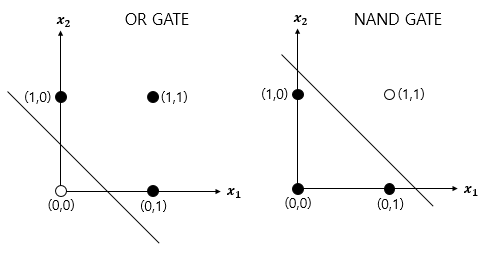

# **2.  XOR 연산이 가능한 다층 퍼셉트론**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

numpy를 import하고, 그래프를 그려주는 오픈소스 matplotlib.pyplot을 import합니다.

U: 연결강도 $\mathbf U$

W: 연결강도 $\mathbf W$

learning_rate: 학습률 $\eta$

In [7]:
U = np.random.rand(2,3)   # 연결강도 
W = np.random.rand(3,2)   # 연결강도 
learning_rate = 1.0       # 학습률 

다층 퍼셉트론에는 비선형 활성 노드의 3개 이상의 레이어로 구성된다.
이 레이어에는 입력층과 은닉층(Hidden Layer), 출력층이 있다.

여기서 각 레이어는 연결선으로 연결되어 있다.
연결선에는 가중치(Weight)를 포합하고 있는데, 이 가중치가 나타내는 의미를 연결강도라고 한다.
이를 U, W로 랜덤한 수의 2x3 행렬, 3x2 행렬로 각각 연결한다.
학습률은 1.0으로 한다.

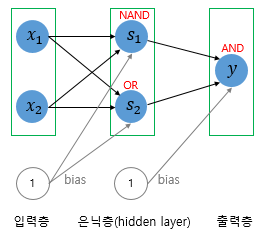

In [8]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

def derivative_sigmoid(v):
    s = sigmoid(v)
    return s*(1-s)

Sigmoid(시그모이드) 함수는 S자형 곡선 또는 시그모이드 곡선을 갖는 수학 함수이다. 시그모이드 함수는 실함수로써 유계이고 미분가능하며, 모든 점에서 음이 아닌 미분값을 가지고 단 하나의 변곡점을 가진다.

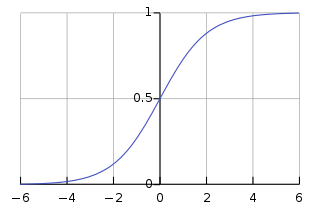


데이터를 두 개의 그룹으로 분류하는 문제에서 가장 기본적인 방법은 로지스틱 회귀분석이다. 회귀분석과의 차이는 회귀분석에서는 원하는 값이 예측값(실수)이기 때문에 종속변수의 범위가 실수이지만 로지스틱 회귀분석에서는 종속변수 y 값이 0 또는 1을 갖는다. 그래서 주어진 데이터를 분류할 때 0인지 1인지 예측하는 모델을 만들어야 한다.

이때 위와 같은 그래프의 형태로 활성함수가 사용되는데, 이러한 특징을 만족하는 함수가 시그모이드 함수이다.
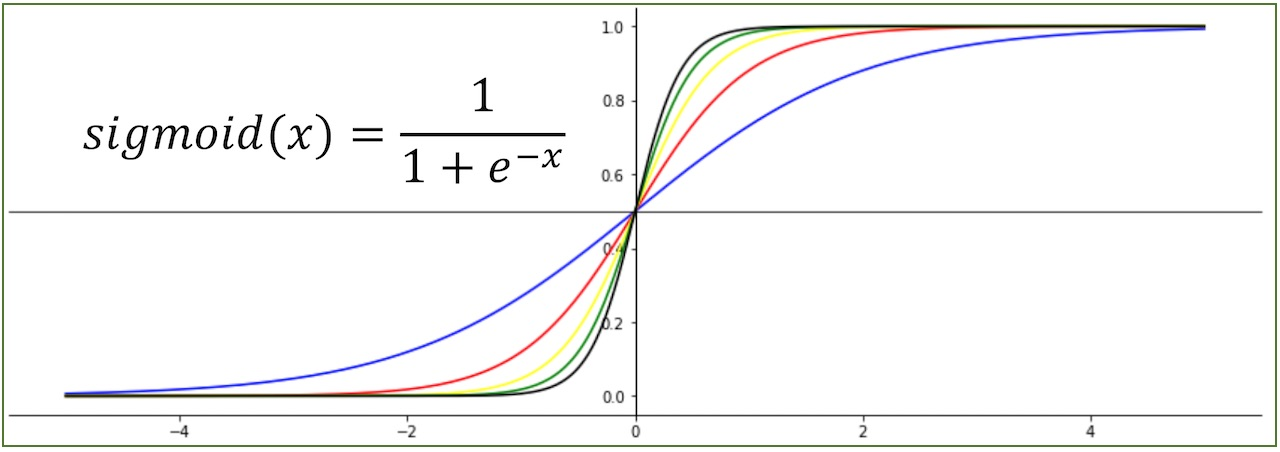

또한 이러한 sigmoid 함수를 미분한 것이 derivative_sigmoid이다.

순전파시 계산될 값들 : $\mathbf h^{\Sigma} ~ \mathbf h^{\phi} ~ \mathbf h^{{\phi}'}$

역전파시 계산될 값들 : $\mathbf e^h ~ \delta^h$


순전파시 계산될 값들 : $\mathbf y^{\Sigma} ~ \mathbf y^{\phi} ~ \mathbf y^{{\phi}'}$

역전파시 계산될 값들 : $ \mathbf e^y ~ \delta^y $

순전파시 h는 은닉계층의 합과 미분값을 계산합니다.
e는 오차값을 가르키며, δ는 출력층을 의미하는데, 통상적으로 신경망의 출력과 목표 출력의 차가 됩니다.

역전파 시에 h(은닉계층)과 y(출력계층)이 오차 기울기(가중치에 대한 오차의 미분)를 계산하여 실제값과 출력값을 맞추어 나갑니다.

In [9]:
input = np.zeros(2)

# 순전파시 계산될 값들 
h_sum, h_out, h_deriv = np.zeros(3), np.zeros(3), np.zeros(3)
# 역전파시 계산될 값들 
h_error, h_delta = np.zeros(3), np.zeros(3)                  

# 순전파시 계산될 값들 
y_sum, y_out, y_deriv = np.zeros(2), np.zeros(2), np.zeros(2)
# 역전파시 계산될 값들 
y_error, y_delta = np.zeros(2), np.zeros(2)

순전파란, Input에서부터 Output이 나올때까지 순서대로 계산을 하는 과정을 의미합니다.
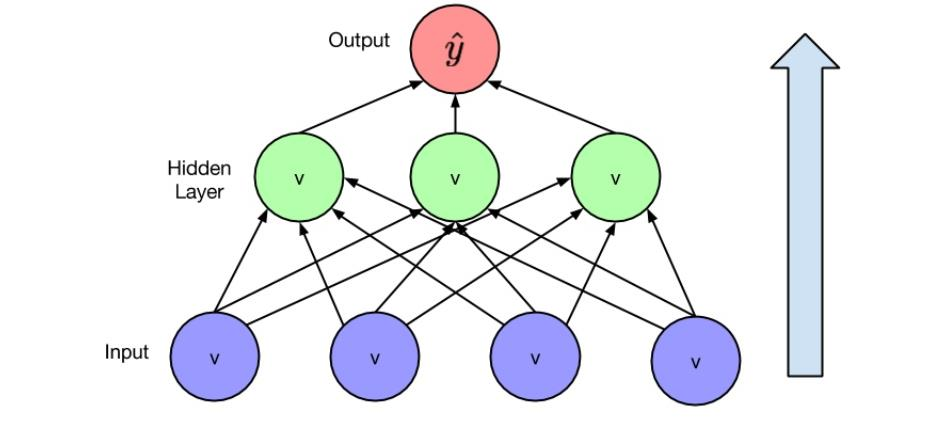

역전파란, 학습하는 과정에서 출력층에서 입력층 방향으로 계산하여 Output(예측값:ŷ)과 실제값(y)의 차이를 가중치에 반영합니다.
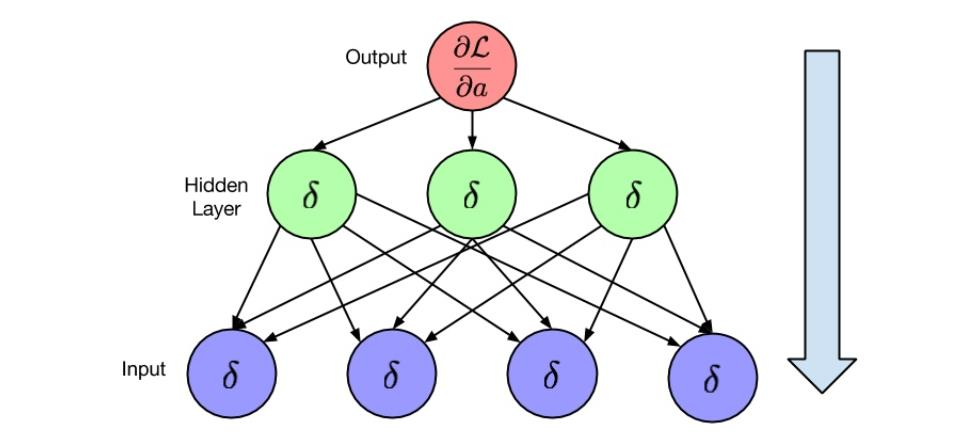

은닉층에서 합산된 값: $\mathbf h^{\Sigma} = \mathbf U^{\mathrm T} \mathbf x$

은닉층의 활성화 값: $\mathbf h^{\phi} = \phi(\mathbf h^{\Sigma})$

은닉층 활성화 미분치: $\mathbf h^{{\phi}'} = \phi'(\mathbf h^{\Sigma})$

In [10]:
def forward_xh(x):
    global input, h_sum, h_out, h_deriv
    input = x
    h_sum = U.T.dot(input)                 # 은닉층에서 합산된 값
    h_out = sigmoid(h_sum)                 # 은닉층의 활성화 값
    h_deriv = derivative_sigmoid(h_sum)    # 은닉층 활성화 미분치

forward_xh(X(입력층)->H(은닉층))

x를 input으로 넣어
U(연결강도)와 input을 T(Transpose, 전치)후 내적합니다.
(x에 가중치를 더해 나가는 것임)

활성화 값에는 시그모이드 함수를 사용하며,
활성화 미분치는 시그모이드 미분을 사용합니다.

출력층에서 합산된 값: $\mathbf y^{\Sigma} = \mathbf W^{\mathrm T} \mathbf x$

출력층의 활성화 값: $\mathbf y^{\phi} = \phi(\mathbf y^{\Sigma})$

출력층 활성화 미분치: $\mathbf y^{{\phi}'} = \phi'(\mathbf y^{\Sigma})$

In [11]:
def forward_hy():
    global y_sum, y_out, y_deriv
    y_sum = W.T.dot(h_out)                  # 출력층에서 합산된 값
    y_out = sigmoid(y_sum)                  # 출력층의 활성화 값
    y_deriv = derivative_sigmoid(y_sum)     # 출력층의 활성화 미분치

forward_hy(H(은닉층)->Y(출력층))

마찬가지로 W(연결강도)를 활성화 함수(시그모이드)에 의한 활성화 값 (h_out)와 Transpose(T, 전치)후 내적합니다.

출력층의 활성화 값은 위의 합산된 값(y_sum)을 다시 시그모이드 함수로 활성화합니다.

마찬가지로 출력층의 활성화 미분치는 시그모이드 미분을 사용합니다.

오차 계산: $ \mathbf y^{\phi} - \mathbf t$

In [12]:
def compute_error(target):
    return y_out - target  

오차를 계산합니다.
y_out(출력값)과 target(실제값)의 차이입니다.

출력층 오차 : $\mathbf e^y$

출력층에서 보내는 델타: $\delta^y = \mathbf y^{{\phi}'} \otimes \mathbf e^y$

연결강도 갱신: $\Delta \mathbf W = \eta \mathbf h^{\phi} {\delta^y}^{\mathrm T}$

In [13]:
def backward_y(error):
    global y_error, y_delta, W
    y_error = error                                    # 출력층 오차
    y_delta = y_deriv * y_error                        # 출력층에서 보내는 델타
    ## 연결강도 W 수정
    dW = - learning_rate * np.outer(h_out, y_delta)    # 연결강도 갱신: 은닉층 출력과 출력층 델타의 외적
    W = W + dW   

backward_y(error) : y 출력층 오차 개선

역전파를 수행합니다.
출력층에서의 오차를 error라고 합니다.
이때 delta 값은 y_deriv와 오차를 곱합니다.

오차를 통해 dW(새 연결강도)를 갱신합니다.
이는 은닉층 출력값과 출력층 델타와 외적하며 (-1)learning_rate(학습률)을 곱합니다.

이를 다시 W(연결강도)로 갱신합니다.

은닉층 오차 : $\mathbf e^h = \mathbf W \delta^y$

은닉층에서 보내는 델타: $\delta^h = \mathbf h^{{\phi}'} \otimes \mathbf e^h$

연결강도 갱신: $\Delta \mathbf U = \eta \mathbf x^{\phi} {\delta^h}^{\mathrm T}$

In [14]:
def backward_h():
   global h_error, h_delta, U
   h_error = W.dot(y_delta)                             # 은닉층 오차
   h_delta = h_deriv * h_error                          # 은닉층에서 보내는 델타
   ## 연결강도 U 수정
   dU = - learning_rate * np.outer(input, h_delta)      # 연결강도 갱신
   U = U + dU  

backward_h(error) : h 은닉층 오차 개선

은닉층 오차 역시도 반영하여 갱신합니다.
연결강도 W와 y_delta 내적하여 은닉층 오차를 구합니다.
h_delta(은닉층 델타값)는 h_deriv와 오차를 곱합니다.

이를 통해 dU라는 값에 학습률과 input과 h_delta를 외적하여 곱한 값을 넣고 마찬가지로 U(연결강도) 역시 갱신합니다.

In [15]:
def train(x, target):
    forward_xh(x)
    forward_hy()
    e = compute_error(target)
    backward_y(e)
    backward_h()
    return e**2

위의 함수를 train 함수를 통해 x 입력값과 target 실제 값을 넣어 모델 훈련을 합니다.

x를 입력하여 순전파 : 입력층 -> 은닉층 -> 출력층 통과후 
e라는 오차를 계산하여(출력값 - 실제값)
다시 e를 넣어 역전파 : 출력층 개선, 은닉충 개선합니다.
이후 e를 제곱한 값을 return합니다.

In [16]:
loss = []

for i in range(1000):
    e_accum=0
    true = np.array([1,0])
    false = np.array([0,1])
    e_accum += train(np.array([0,0]), false)    # 훈련 데이터 1 
    e_accum += train(np.array([0,1]), true)     # 훈련 데이터 2
    e_accum += train(np.array([1,0]), true)     # 훈련 데이터 3
    e_accum += train(np.array([1,1]), false)    # 훈련 데이터 4
    loss.append(e_accum)

[0,0], [0,1], [1,0], [1,1]을 각각 train하여 false true 실제값과 맞는지 훈련을 합니다.
이때 각 손실값 e_accum은 loss에 저장합니다.

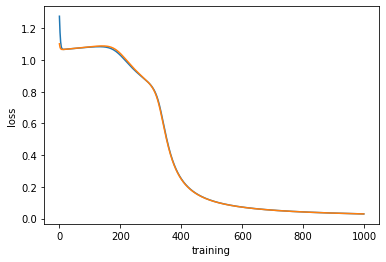

In [17]:
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('training')
plt.show()

y에 손실(loss), x에 training 횟수를 넣어 그래프로 표현합니다.

In [18]:
def test(X):
    y_hat = []
    for x in X:
        forward_xh(x)
        forward_hy()
        y_hat.append(y_out)
    return y_hat

test 함수에 X를 입력받습니다.

y_hat : 예측값(출력값)을 넣을 배열 []을 만듭니다.

X의 행렬을 하나씩 넣어 순전파를 진행합니다.

이후 y_out(출력값, 예측값)을 y_hat에 append 넣습니다.


In [19]:
test(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]))

[array([0.1240645 , 0.87607194]),
 array([0.9228947 , 0.07701169]),
 array([0.92225146, 0.07765157]),
 array([0.03824221, 0.96183494])]

test의 순전파를 진행한 결과, 다음과 같은 결과를 얻는다.

처음 값은 약 [0.12, 0.87]로 [0,1]에 가깝게 나왔다.

두번째 값은 약 [0.92, 0.77]로 [1,1]에 가깝게 나왔다.

세번째 값은 약 [0.92, 0.77]로 [1,1]에 가깝게 나왔다.

네번째 값은 약 [0.38, 0.96]로 [0,1]에 가깝게 나왔다.

XOR 게이트는 둘 중 하나만 1일 때 True가 출력된다.
따라서 두번째 세번째 값이 [1,1]로 True가 나왔고, 나머지는 [0,1]로 False가 나왔다.


